# EU Cities Temperatures
Load the CSV file EuCitiesTemperatures.csv (213 records) into a Pandas DataFrame and perform the following tasks on it.

In [1]:
import pandas as pd

temps = pd.read_csv("../data/EuCitiesTemperatures.csv")

## Preprocessing / analysis
1. Fill in the missing latitude and longitude values by calculating the average temps for that country. Round the average to 2 decimal places.

In [2]:

temps[['latitude','longitude']] = temps[['latitude','longitude']].fillna(temps.groupby('country')[['latitude','longitude']].transform('mean').round(2))
display(temps[['latitude','longitude']])


,latitude,longitude
0,41.12,20.08
1,42.50,1.52
2,47.85,11.41
3,47.08,14.02
4,48.32,14.29
...,...,...
208,55.95,-2.94
209,50.70,-3.53
210,53.55,-4.23
211,55.87,-4.25


2. Find the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximal number of cities in this geographical band. (More than one country could have the maximal number of values.))

In [3]:
lon_gte15 = temps[temps['longitude'] >= 15]
lon_lte30 = temps[temps['longitude'] <= 30]
lat_gte40 = temps[temps['latitude'] >= 40]
lat_lte60 = temps[temps['latitude'] <= 60]

lon_in_range = pd.merge(lon_gte15, lon_lte30, how='inner')
lat_in_range = pd.merge(lat_gte40, lat_lte60, how='inner')
subset = pd.merge(lon_in_range, lat_in_range, how='inner')

city_count = subset.value_counts(['country'])
maximal_cities = city_count[city_count == city_count.max()]
display(maximal_cities)

country
Romania    9
Poland     9
dtype: int64

3. Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU and whether it has a coastline. For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will  fill it with the average temperature of cities with EU='no' and coastline='yes'.

In [4]:
temps['temperature'] = temps['temperature'].fillna(
    temps.groupby(['EU','coastline'])['temperature'].transform('mean').round(2)
)
display(temps['temperature'])

0      15.18
1       7.48
2       4.54
3       6.91
4       6.79
       ...  
208    10.31
209    10.14
210     8.00
211     8.60
212     9.73
Name: temperature, Length: 213, dtype: float64

## Visualization
For all plots, make sure to label the axes, and set appropriate tick labels.

1.  Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

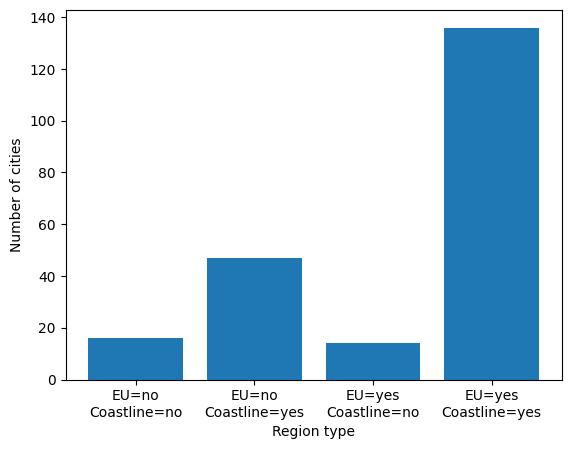

In [5]:
from matplotlib import pyplot as plt

grouped_types = temps.groupby(['EU','coastline'])
regiontype_groups = [f"EU={g[0]}\nCoastline={g[1]}" for g in grouped_types.groups]
regiontype_values = [len(grouped_types.get_group(g)) for g in grouped_types.groups]

plt.xlabel("Region type")
plt.ylabel("Number of cities")
plt.bar(regiontype_groups, regiontype_values)
plt.show()

2. Plot a scatter plot of latitude (y-axis) vs. longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color

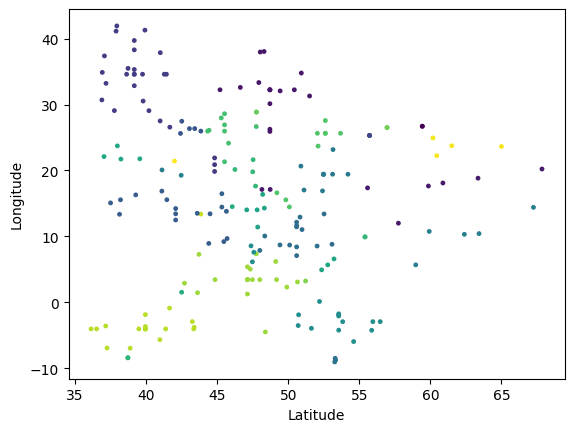

In [6]:
plt.scatter(
    temps['longitude'],
    temps['latitude'],
    6,
    [hash(country) for country in temps['country']]
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

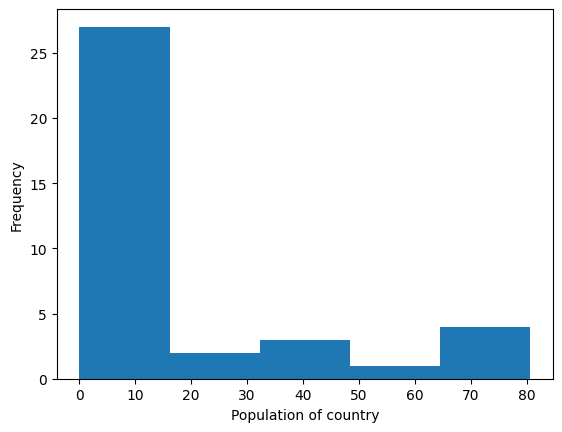

In [7]:
plt.hist(temps['population'].unique(), bins=5)
plt.xlabel("Population of country")
plt.ylabel("Frequency")
plt.show()